In [2]:
from tyssue import Sheet

from tyssue import PlanarGeometry as geom

from tyssue.draw import sheet_view

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cellmap = Sheet.planar_sheet_2d('2DCellmap', 7, 7, 1, 1)

geom.update_all(cellmap)

C++ extension are not available for this version


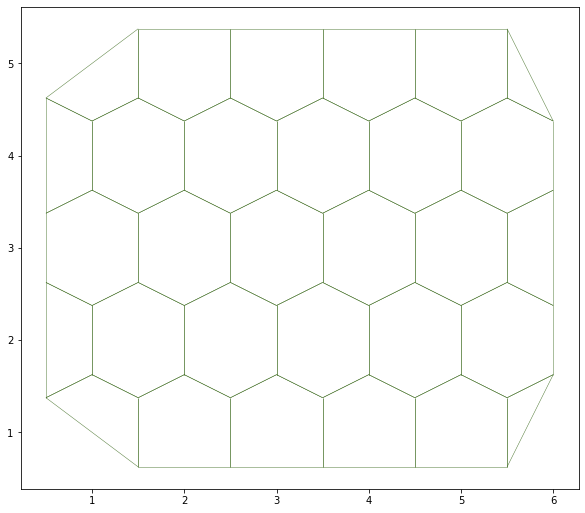

In [8]:
fig, axis = sheet_view(cellmap)

fig.set_size_inches(10, 10)

cellmap.sanitize(trim_borders=True, order_edges=True)

geom.update_all(cellmap)

In [18]:
cellmap.edge_df

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,ty,fx,fy,ux,uy,rx,ry,sub_area,is_valid,phi
edge,,,,,,,,,,,,,,,,,,,,
0,27,0.28125,0.750000,0,4,0.0,0.75,1.5,0.625,1.5,1.375,1.125000,1.250000,0.000000,1.000000,0.375000,-0.625000,0.140625,True,-0.643501
1,25,0.15625,0.559017,0,27,-0.5,0.25,1.5,1.375,1.0,1.625,1.125000,1.250000,-0.894427,0.447214,0.375000,0.125000,0.078125,True,0.643501
2,4,0.34375,1.250000,0,1,1.0,-0.75,0.5,1.375,1.5,0.625,1.125000,1.250000,0.800000,-0.600000,-0.625000,0.125000,0.171875,True,0.643501
3,1,0.21875,0.559017,0,25,-0.5,-0.25,1.0,1.625,0.5,1.375,1.125000,1.250000,-0.894427,-0.447214,-0.125000,0.375000,0.109375,True,1.570796
4,23,0.37500,0.750000,1,22,0.0,0.75,2.5,0.625,2.5,1.375,2.000000,1.125000,0.000000,1.000000,0.500000,-0.500000,0.187500,True,-0.643501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,41,0.37500,0.750000,28,6,0.0,0.75,5.5,4.625,5.5,5.375,5.000000,4.875000,0.000000,1.000000,0.500000,-0.250000,0.187500,True,-0.643501
152,36,0.37500,0.750000,28,37,0.0,-0.75,4.5,5.375,4.5,4.625,5.000000,4.875000,0.000000,-1.000000,-0.500000,0.500000,0.187500,True,2.498092
153,5,0.12500,0.559017,29,6,0.5,-0.25,5.5,4.625,6.0,4.375,5.666667,4.791667,0.894427,-0.447214,-0.166667,-0.166667,0.062500,True,-2.543174


In [7]:
cellmap.datasets

{'vert':           y  is_active    x
 vert                       
 0     2.625          1  0.5
 1     1.375          1  0.5
 2     3.375          1  0.5
 3     4.375          1  3.0
 4     0.625          1  1.5
 5     4.375          1  6.0
 6     4.625          1  5.5
 7     3.625          1  6.0
 8     3.375          1  5.5
 9     4.625          1  3.5
 10    4.625          1  2.5
 11    5.375          1  2.5
 12    3.625          1  1.0
 13    3.625          1  2.0
 14    3.375          1  1.5
 15    4.375          1  2.0
 16    3.375          1  2.5
 17    3.375          1  3.5
 18    3.625          1  3.0
 19    2.625          1  2.5
 20    2.375          1  3.0
 21    2.625          1  3.5
 22    0.625          1  2.5
 23    1.375          1  2.5
 24    1.625          1  3.0
 25    1.625          1  1.0
 26    1.625          1  2.0
 27    1.375          1  1.5
 28    2.625          1  1.5
 29    2.375          1  1.0
 30    2.375          1  2.0
 31    3.625          1  4.0
 32   

In [9]:
for element, data in cellmap.datasets.items():
    print(f"{element} dataset has values {data.shape}")

vert dataset has values (58, 3)
edge dataset has values (156, 20)
face dataset has values (30, 7)


In [10]:
spec = {
    "vert": {
        "x": 0.0,
        "y": 0.0,
        "active": True
    },
    "edge": {
        "tension": 0.0,
        "length": 1,
    },
    "face": {
        "area": 0.0,
        "alive": True,
    },
}

In [6]:
cellmap.update_specs({"edge": {"tension": 1.0}})
cellmap.edge_df['tension'].head()

edge
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: tension, dtype: float64

In [11]:
print('Faces associated with the first edges:')
print(cellmap.edge_df['face'].head())
print('\n')

sixth_edge = cellmap.edge_df.loc[6, 'face']

Faces associated with the first edges:
edge
0    0
1    0
2    0
3    0
4    1
Name: face, dtype: int64




In [8]:
print('Area of cell # {}:'.format(int(sixth_edge)))
print(cellmap.face_df.loc[sixth_edge, 'area'])

Area of cell # 4:
0.875


In [9]:
print('Upcasted areas over the edges:')
print(cellmap.upcast_face(cellmap.face_df['area']).head())

Upcasted areas over the edges:
edge
0    0.500
1    0.500
2    0.500
3    0.500
4    0.875
Name: area, dtype: float64


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from tyssue import Sheet
from tyssue import PlanarGeometry
from tyssue.generation import generate_ring
from tyssue import config
from tyssue.draw import sheet_view

/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anaconda3/envs/VertexModel/lib/python3.9/site-packages/tyssue/topology/base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
/Users/v_lachina/opt/anac

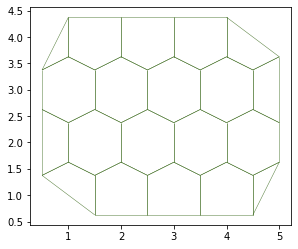

In [11]:
sheet_2d = Sheet.planar_sheet_2d('planar', nx=6, ny=6, 
                                 distx=1, disty=1)

sheet_2d.sanitize(trim_borders=True, order_edges=True)
fig, ax = sheet_view(sheet_2d)

In [19]:
centered2Dmap = sheet_2d.vert_df[sheet_2d.coords].mean(axis=0)
print("Sheet center of mass :")
print(centered2Dmap)

Sheet center of mass :
x    0.0
y    0.0
dtype: float64


In [13]:

# Translate vertices by - 

sheet_2d.vert_df[sheet_2d.coords] -= centered2Dmap

print("New center of mass :")
print(sheet_2d.vert_df[sheet_2d.coords].mean(axis=0))

New center of mass :
x    0.0
y    0.0
dtype: float64


In [17]:
sheet_2d.vert_df

,y,is_active,x
vert,,,
0,0.125,1,-2.25
1,0.875,1,-1.25
2,0.125,1,-0.25
3,0.875,1,-2.25
4,1.125,1,-1.75
5,-0.875,1,0.25
6,-0.125,1,0.25
7,-0.125,1,1.25
8,0.125,1,0.75
